In [1]:
# import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

import time
from datetime import datetime

# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read and show the head of the dataset
df = pd.read_csv('dataset/full_COA_v3.csv' , index_col='Time',parse_dates=True)
df.head()

,COA,temp,dewPoint,humidity,windSpeed,year,quarter,month,day,weekday_0,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_name,hour_24,weekday_no,weekend_bool,school_vacation
Time,,,,,,,,,,,,,,,,,,,,,
2012-01-01 01:00:00,5986.0,13.98,0.01,0.38,3.09,2012,1,1,1,0,...,0,0,0,0,1,Sunday,1,6,0.0,0.0
2012-01-01 02:00:00,5547.0,11.98,0.99,0.47,2.06,2012,1,1,1,0,...,0,0,0,0,1,Sunday,2,6,0.0,0.0
2012-01-01 03:00:00,5233.0,11.98,0.99,0.47,2.06,2012,1,1,1,0,...,0,0,0,0,1,Sunday,3,6,0.0,0.0
2012-01-01 04:00:00,5150.0,11.98,0.01,0.44,2.06,2012,1,1,1,0,...,0,0,0,0,1,Sunday,4,6,0.0,0.0
2012-01-01 05:00:00,5235.0,11.98,0.01,0.44,3.60,2012,1,1,1,0,...,0,0,0,0,1,Sunday,5,6,0.0,0.0


In [3]:
# change frequency to 
df.index.freq = 'H'

In [4]:
df.tail()

,COA,temp,dewPoint,humidity,windSpeed,year,quarter,month,day,weekday_0,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_name,hour_24,weekday_no,weekend_bool,school_vacation
Time,,,,,,,,,,,,,,,,,,,,,
2017-12-31 19:00:00,9495.0,18.98,-2.00,0.24,1.5,2017,4,12,31,0,...,0,0,0,0,1,Sunday,19,6,0.0,0.0
2017-12-31 20:00:00,9365.0,16.98,-2.00,0.27,1.5,2017,4,12,31,0,...,0,0,0,0,1,Sunday,20,6,0.0,0.0
2017-12-31 21:00:00,9250.0,15.98,-2.00,0.29,1.5,2017,4,12,31,0,...,0,0,0,0,1,Sunday,21,6,0.0,0.0
2017-12-31 22:00:00,8931.0,14.98,-2.00,0.31,1.0,2017,4,12,31,0,...,0,0,0,0,1,Sunday,22,6,0.0,0.0
2017-12-31 23:00:00,8679.0,12.98,-1.01,0.38,0.0,2017,4,12,31,0,...,0,0,0,0,1,Sunday,23,6,0.0,0.0


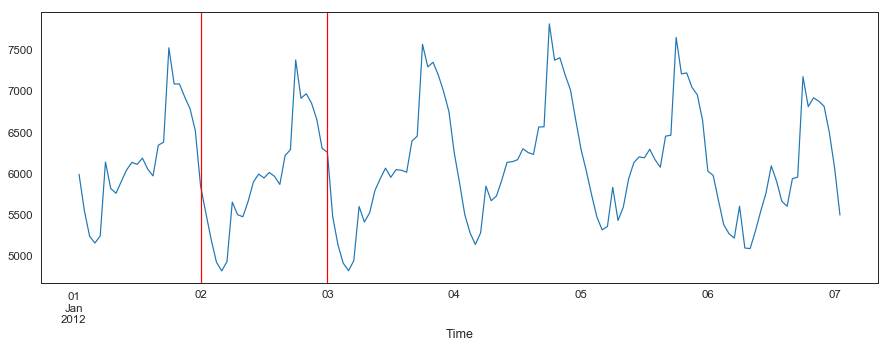

In [5]:
df['2012-01-01 01:00:00':'2012-01-07 01:00:00'].COA.plot(figsize=(15,5))
plt.axvline('2012-01-02 00:00:00' , c='r')
plt.axvline('2012-01-03 00:00:00' , c='r')

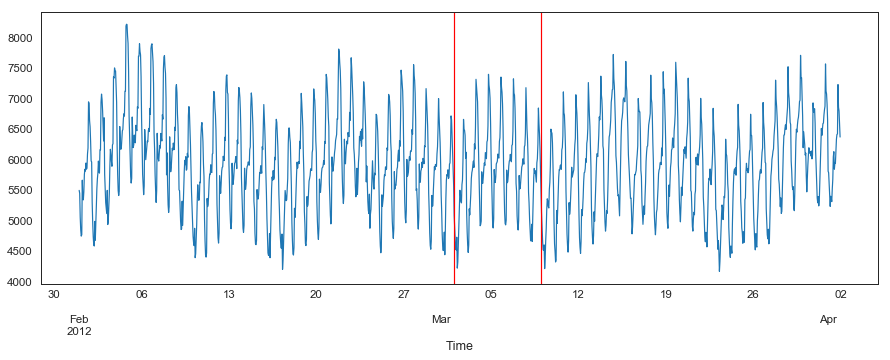

In [6]:
df['2012-02-01':'2012-4-01'].COA.plot(figsize=(15,5))
plt.axvline('2012-03-02' , c='r')
plt.axvline('2012-03-09',c='r')

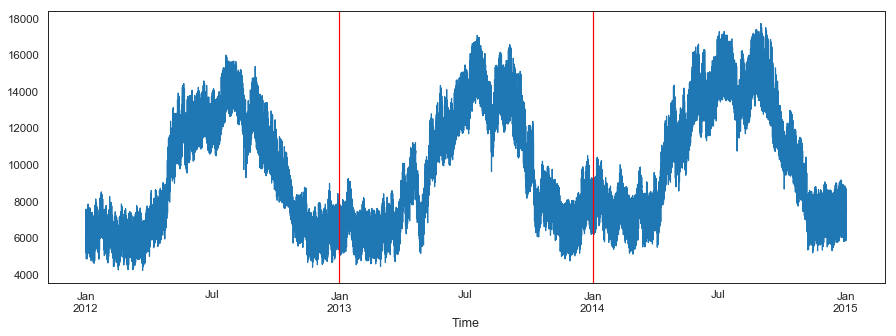

In [7]:
df['2012-01-01':'2015-01-01'].COA.plot(figsize=(15,5))
plt.axvline('2013-01-01' , c='r')
plt.axvline('2014-01-01',c='r')

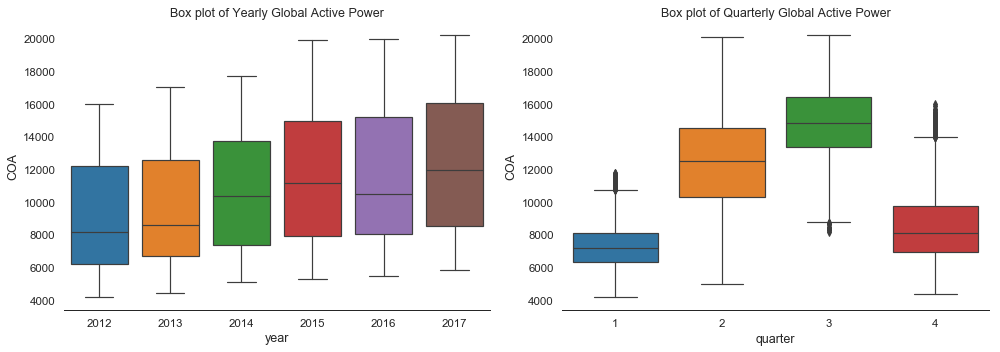

In [8]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.2)
sns.boxplot(x="year", y="COA", data=df)
plt.xlabel('year')
plt.title('Box plot of Yearly Global Active Power')
sns.despine(left=True)
plt.tight_layout()
plt.subplot(1,2,2)
sns.boxplot(x="quarter", y="COA", data=df)
plt.xlabel('quarter')
plt.title('Box plot of Quarterly Global Active Power')
sns.despine(left=True)
plt.tight_layout();

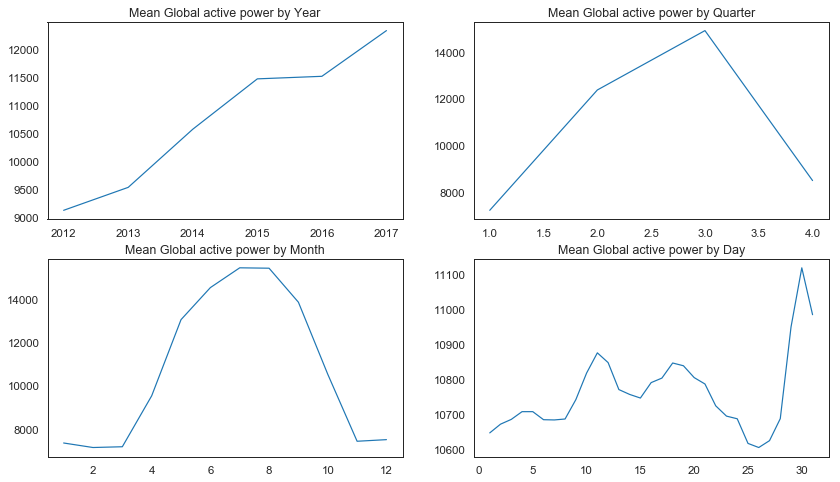

In [9]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
df.groupby('year').COA.agg('mean').plot()
plt.xlabel('')
plt.title('Mean Global active power by Year')

plt.subplot(2,2,2)
df.groupby('quarter').COA.agg('mean').plot()
plt.xlabel('')
plt.title('Mean Global active power by Quarter')

plt.subplot(2,2,3)
df.groupby('month').COA.agg('mean').plot()
plt.xlabel('')
plt.title('Mean Global active power by Month')

plt.subplot(2,2,4)
df.groupby('day').COA.agg('mean').plot()
plt.xlabel('')
plt.title('Mean Global active power by Day');

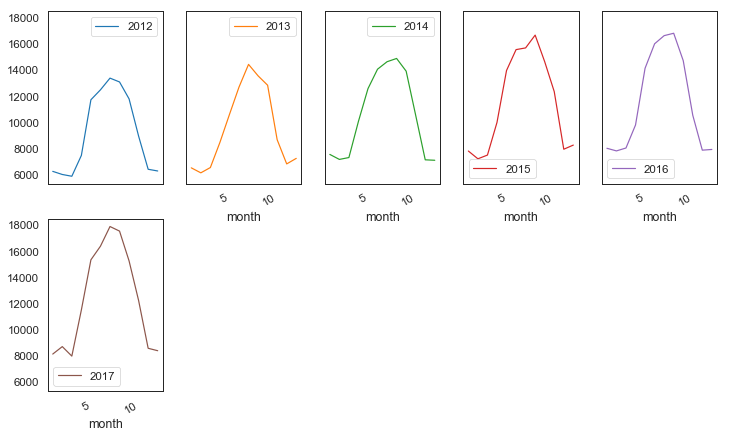

In [10]:
pd.pivot_table(df, values = "COA", 
               columns = "year", index = "month").plot(subplots = True, figsize=(12, 12), layout=(3, 5), sharey=True);

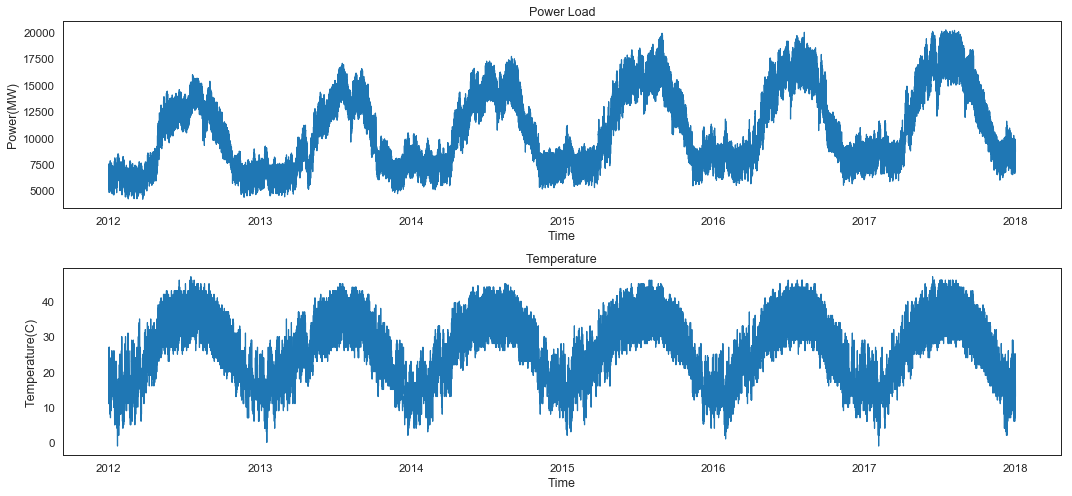

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,7))
axes[0].set_title('Power Load')
axes[0].set_ylabel('Power(MW)')
axes[0].set_xlabel('Datetime')
df.COA.plot(ax=axes[0])
axes[1].set_title('Temperature')
axes[1].set_ylabel('Temperature(C)')
axes[1].set_xlabel('Datetime')
df.temp.plot(ax=axes[1])
plt.tight_layout()
plt.show()

In [12]:
df_l = df.reset_index()

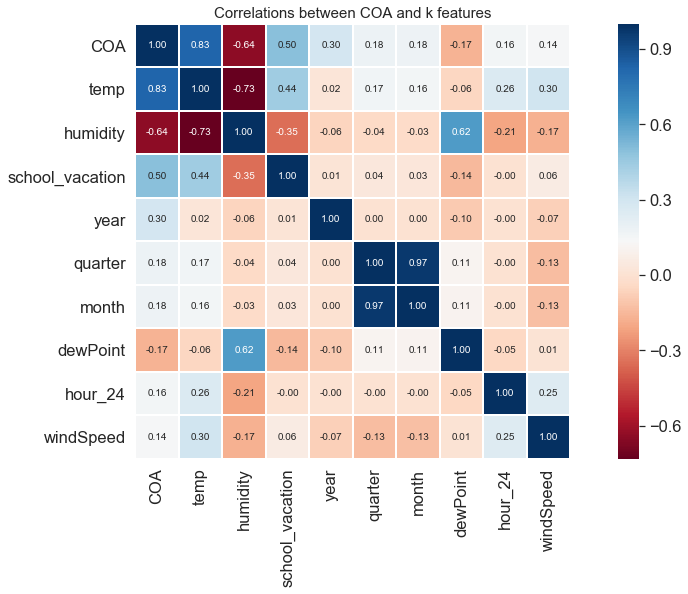

In [13]:
#COA correlation matrix
corrmat = abs(df_l.drop(columns=['Time']).iloc[:df_l.drop(columns=['Time']).shape[0],:].corr())
plt.figure(figsize=(17, 8))
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'COA')['COA'].index
cm = np.corrcoef(df_l.drop(columns=['Time']).iloc[:df_l.drop(columns=['Time']).shape[0],:][cols].values.T)
sns.set(font_scale=1.50)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                 fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,
                 cmap = 'RdBu', linecolor = 'white', linewidth = 1)
plt.title("Correlations between COA and k features", fontsize =15)
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [16]:
adf_test(df.COA)

Augmented Dickey-Fuller Test: 
ADF test statistic         -3.208369
p-value                     0.019505
# lags used                58.000000
# observations          52548.000000
critical value (1%)        -3.430474
critical value (5%)        -2.861595
critical value (10%)       -2.566799
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
